# Ashim Nepal
**Course:** MSCS-634 Advanced Big Data and Data Mining

**Lab 1:** Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

---
## Step 1: Load Dataset
This notebook uses the OpenPowerlifting dataset to explore and analyze athlete performance across various attributes.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv' , low_memory=False)

# Displaying the rows
df.head()


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


## Step 2: Data Visualization
Visualizing key relationships and distributions in the dataset.

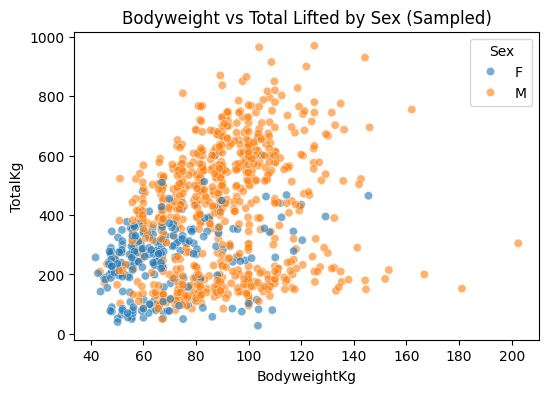

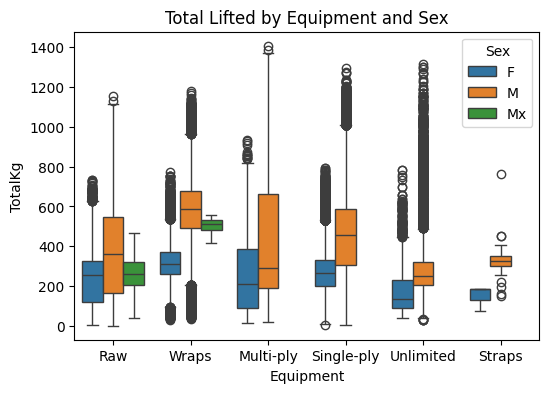

In [4]:
# Scatter Plot: Bodyweight vs Total Lifted
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df.sample(1000, random_state=42),  # sample only 1000 rows
    x='BodyweightKg',
    y='TotalKg',
    hue='Sex',
    alpha=0.6
)
plt.title('Bodyweight vs Total Lifted by Sex (Sampled)')
plt.show()


# Box Plot: Total Lifted by Equipment Type
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Equipment', y='TotalKg', hue='Sex')
plt.title('Total Lifted by Equipment and Sex')
plt.show()

### Insights:
- Heavier athletes tend to lift more total weight.
- Equipped lifters (e.g., single-ply, multi-ply) often have higher totals than raw lifters.

## Step 3: Data Preprocessing
This section handles missing values, outliers, data reduction, and scaling.

In [5]:
# Check missing values
df.isnull().sum().head(20)

Name                    0
Sex                     0
Event                   0
Equipment               0
Age               1070337
AgeClass           814256
BirthYearClass    1000666
Division             1435
BodyweightKg        38368
WeightClassKg       40757
Squat1Kg          2137906
Squat2Kg          2147142
Squat3Kg          2171053
Squat4Kg          3034560
Best3SquatKg      1009169
Bench1Kg          1652910
Bench2Kg          1668528
Bench3Kg          1710945
Bench4Kg          3022026
Best3BenchKg       358566
dtype: int64

In [7]:
# Handle missing values
df = df.assign(
    TotalKg=df['TotalKg'].fillna(df['TotalKg'].mean()),
    BodyweightKg=df['BodyweightKg'].fillna(df['BodyweightKg'].mean())
)

df.dropna(subset=['Sex', 'Equipment'], inplace=True)
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [8]:
# Outlier Detection using IQR
Q1 = df['TotalKg'].quantile(0.25)
Q3 = df['TotalKg'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TotalKg'] < (Q1 - 1.5 * IQR)) | (df['TotalKg'] > (Q3 + 1.5 * IQR))]
print('Number of outliers:', len(outliers))

# Remove outliers
df = df[~((df['TotalKg'] < (Q1 - 1.5 * IQR)) | (df['TotalKg'] > (Q3 + 1.5 * IQR)))]
df.head()

Number of outliers: 5219


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [9]:
# Data Reduction
df_sample = df.sample(frac=0.5, random_state=42)
df_reduced = df_sample.drop(['MeetCountry', 'BirthYearClass'], axis=1, errors='ignore')
print('Original shape:', df.shape)
print('Reduced shape:', df_reduced.shape)

Original shape: (3037794, 41)
Reduced shape: (1518897, 39)


In [12]:
# Data Scaling and Discretization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced[['BodyweightKg', 'TotalKg']] = scaler.fit_transform(df_reduced[['BodyweightKg', 'TotalKg']])
df_reduced['StrengthLevel'] = pd.cut(df_reduced['TotalKg'], bins=[0,0.33,0.66,1], labels=['Low','Medium','High'])
df_reduced.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetState,MeetTown,MeetName,StrengthLevel
2639440,Casey Williams #2,M,SBD,Single-ply,NaN,NaN,Boys,0.320498,109.7,NaN,...,Yes,NaN,NaN,THSPA,NaN,2015-02-21,TX,Lynn Lucas Middle School,Wildkat Invitational,Medium
2535059,Michael Happach,M,B,Single-ply,50.5,50-54,Masters 47-53,0.333099,110,NaN,...,Yes,USA,IL,WABDL,NaN,2017-07-29,MN,Minneapolis,Midwest Nationals,Low
1994155,Lynne Wilson,F,BD,Raw,26.0,24-34,F-OR,0.247104,90,NaN,...,NaN,New Zealand,NaN,GPC-AUS,GPC,2016-12-04,NaN,NaN,Tri-Nations Push/Pull,Low
1388193,Christina Yearby,F,SBD,Single-ply,NaN,NaN,Louisiana,0.236574,82.5,NaN,...,Yes,NaN,NaN,USAPL,IPF,1998-03-21,TX,Ft. Hood,Collegiate Nationals,Medium
107642,Quinten Koekemoer,M,B,Raw,NaN,NaN,Juniors,0.210951,83,NaN,...,Yes,NaN,NaN,SAPF,IPF,2015-08-15,NaN,Johannesburg,Gauteng Bench Press Championships,Low


## Step 4: Statistical Analysis
Performing summary statistics, central tendency, dispersion, and correlation analysis.

In [13]:
# General overview
df_reduced.info()
df_reduced.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1518897 entries, 2639440 to 2452887
Data columns (total 40 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Name              1518897 non-null  object  
 1   Sex               1518897 non-null  object  
 2   Event             1518897 non-null  object  
 3   Equipment         1518897 non-null  object  
 4   Age               983254 non-null   float64 
 5   AgeClass          1111775 non-null  object  
 6   Division          1518123 non-null  object  
 7   BodyweightKg      1518897 non-null  float64 
 8   WeightClassKg     1498805 non-null  object  
 9   Squat1Kg          450804 non-null   float64 
 10  Squat2Kg          446165 non-null   float64 
 11  Squat3Kg          434393 non-null   float64 
 12  Squat4Kg          4235 non-null     float64 
 13  Best3SquatKg      1014880 non-null  float64 
 14  Bench1Kg          692795 non-null   float64 
 15  Bench2Kg          684969 non-nu

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,983254.000000,1.518897e+06,450804.000000,446165.000000,434393.000000,4235.000000,1.014880e+06,692795.000000,684969.000000,664036.000000,...,508970.000000,499879.000000,479810.000000,11473.000000,1.101247e+06,1.518897e+06,1.405061e+06,1.405061e+06,1.405061e+06,1.280051e+06
mean,30.761568,2.421458e-01,114.881992,99.363845,40.693706,80.830864,1.737713e+02,83.395146,57.326406,-14.785078,...,159.554855,133.915431,23.846548,80.127145,1.897121e+02,3.804293e-01,2.748896e+02,2.737834e+02,2.579583e+02,6.446303e+01
std,13.227907,7.869228e-02,135.371094,159.133020,189.346412,174.035939,6.730545e+01,97.547449,122.305892,138.063463,...,107.025903,154.524066,210.423746,185.273978,6.168008e+01,1.997203e-01,1.285204e+02,1.279391e+02,1.216129e+02,1.622245e+01
min,0.000000,0.000000e+00,-512.500000,-530.700000,-538.000000,-430.000000,-4.775000e+02,-635.500000,-635.500000,-575.000000,...,-500.000000,-502.500000,-587.500000,-461.000000,-3.575000e+02,0.000000e+00,2.430000e+00,2.380000e+00,2.090000e+00,1.370000e+00
25%,20.500000,1.833626e-01,90.000000,80.000000,-150.000000,-40.000000,1.225000e+02,57.500000,-30.000000,-132.500000,...,125.000000,117.500000,-200.000000,-62.500000,1.406100e+02,2.115939e-01,1.452700e+02,1.446300e+02,1.368100e+02,5.282000e+01
50%,27.000000,2.351702e-01,145.000000,145.200000,117.500000,132.500000,1.700000e+02,102.500000,95.000000,-57.500000,...,180.000000,177.500000,125.000000,142.500000,1.900000e+02,3.815540e-01,2.979300e+02,2.968600e+02,2.770100e+02,6.441000e+01
75%,38.500000,2.927343e-01,197.500000,200.000000,192.500000,195.000000,2.175000e+02,140.000000,140.000000,115.700000,...,222.500000,230.000000,205.000000,205.000000,2.350000e+02,5.270355e-01,3.725700e+02,3.708600e+02,3.511400e+02,7.576000e+01
max,98.000000,1.000000e+00,485.000000,517.500000,525.000000,442.500000,5.450000e+02,551.000000,521.630000,635.500000,...,450.000000,460.400000,465.000000,405.000000,4.650000e+02,1.000000e+00,7.991100e+02,7.747600e+02,6.781800e+02,1.761300e+02


In [14]:
# Central Tendency
print('Min:', df_reduced['TotalKg'].min())
print('Max:', df_reduced['TotalKg'].max())
print('Mean:', df_reduced['TotalKg'].mean())
print('Median:', df_reduced['TotalKg'].median())
print('Mode:', df_reduced['TotalKg'].mode()[0])

Min: 0.0
Max: 1.0
Mean: 0.3804292945367225
Median: 0.3815540301508324
Mode: 0.3815540301508324


In [15]:
# Dispersion
range_val = df_reduced['TotalKg'].max() - df_reduced['TotalKg'].min()
iqr = df_reduced['TotalKg'].quantile(0.75) - df_reduced['TotalKg'].quantile(0.25)
var = df_reduced['TotalKg'].var()
std = df_reduced['TotalKg'].std()
print(f'Range: {range_val}\nIQR: {iqr}\nVariance: {var}\nStd Dev: {std}')

Range: 1.0
IQR: 0.3154416243654823
Variance: 0.03988821592257487
Std Dev: 0.19972034428814422


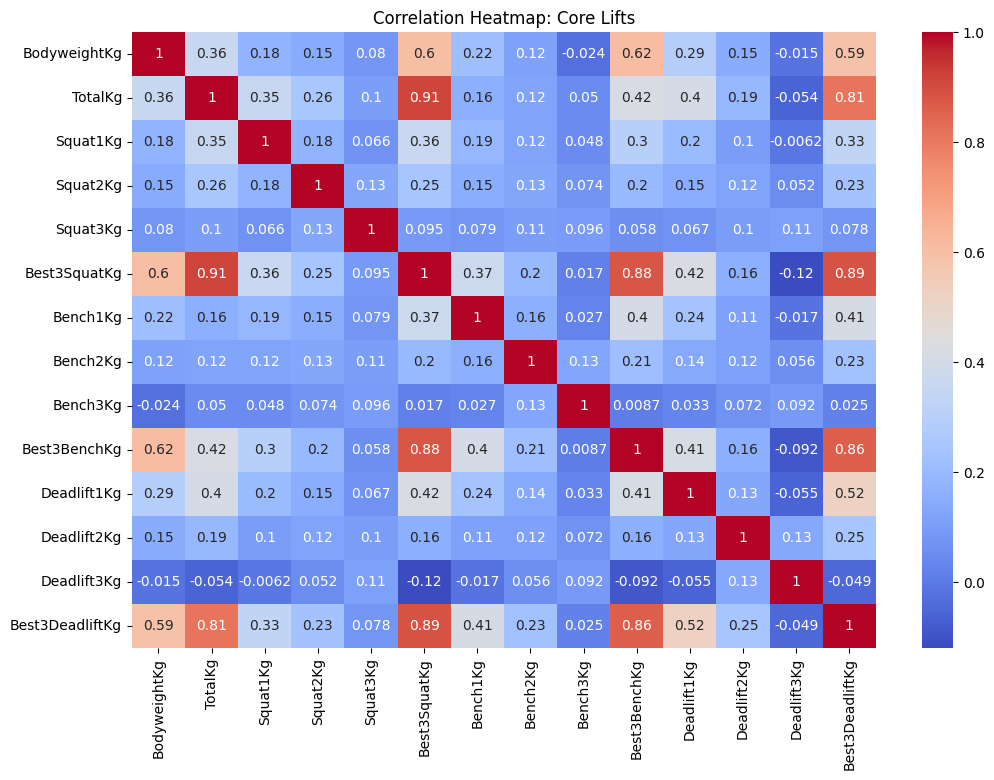

In [18]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    'BodyweightKg', 'TotalKg',
    'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
    'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg',
    'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg'
]

corr_matrix = df_reduced[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Core Lifts')
plt.show()
